In [117]:
import nbsetup
import pickle
import copy
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
with open("daisyscan.pickle", 'rb') as fh:
    scan = pickle.load(fh)

In [10]:
df = scan.dataframe()

In [189]:
def gen_data(incs, x, minus=None, mode='ensembles'):
    data = []
    
    if mode == 'ensembles':
        maximum = incs[0].ensemble_count
    elif mode == 'observations':
        maximum = incs[0].obs_counts['max']
    else:
        raise ValueError('incorrect mode')
    
    for i in minus:
        for j, inc in enumerate(incs):
            if mode == 'ensembles':
                inc.observations = inc.observations[0:maximum-i]
            elif mode == 'observations':
                inc.observations = inc.observations[:, 0:maximum-i]
            
            inc.weights = None
            inc.analyse()
            try:
                chi2, chip, _, _ = inc.chi2()
            except ValueError:
                chi2, chip, _, _ = None, None, None, None
            data.append({
                'chi2': chi2,
                'chi2 p-value': chip,
                'incoherence': inc.incoherence,
                mode: maximum-i,
                'luminosity': x[j],
            })
    return data

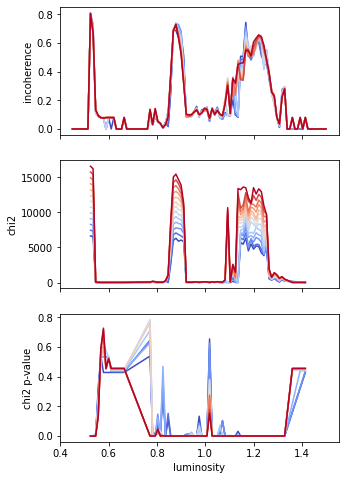

In [199]:
incoherences = copy.deepcopy([series.y[-1] for series in scan.y])
data = pd.DataFrame(gen_data(incoherences, scan.x, range(13)))
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(5,8))
pal = 'coolwarm'
sns.lineplot(data=data, x='luminosity', y='incoherence', hue='ensembles', ax=axes[0], palette=pal, legend=None)
sns.lineplot(data=data, x='luminosity', y='chi2', hue='ensembles', ax=axes[1], palette=pal, legend=None)
g = sns.lineplot(data=data, x='luminosity', y='chi2 p-value', hue='ensembles', ax=axes[2], palette=pal, legend=None)
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
fig.savefig('figures/daisy-ensembles.eps')

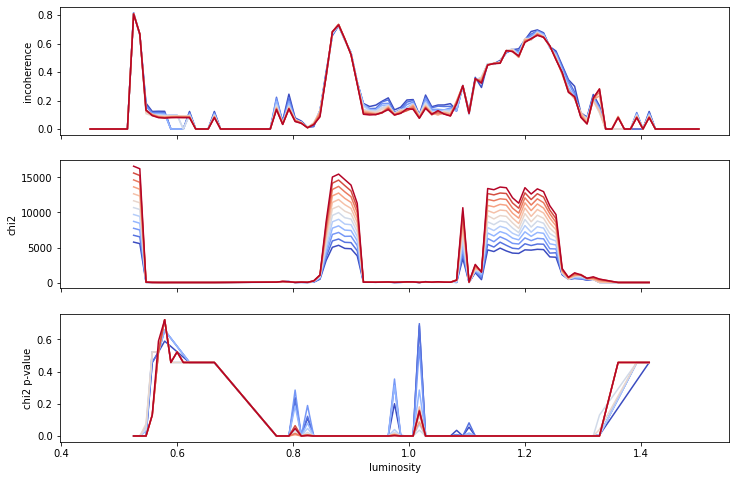

In [204]:
incoherences = copy.deepcopy([series.y[-1] for series in scan.y])
data = pd.DataFrame(gen_data(incoherences, scan.x, range(0, 600, 50), mode='observations'))
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(12,8))
pal = 'coolwarm'
sns.lineplot(data=data, x='luminosity', y='incoherence', hue='observations', ax=axes[0], palette=pal, legend=None)
sns.lineplot(data=data, x='luminosity', y='chi2', hue='observations', ax=axes[1], palette=pal, legend=None)
g = sns.lineplot(data=data, x='luminosity', y='chi2 p-value', hue='observations', ax=axes[2], palette=pal, legend=None)